# Load CSV

In [1]:
from os import path
fname = path.expanduser(r"C:\Users\abhishek\Desktop\Study Material\DataScienceFoundationsPython_LinkedIn\Ex_Files_Data_Science_Python\Exercise Files\Ch04\track.csv")

In [2]:
print('c:\path\to\nowhere.csv') #### backslashes has a special meaning in Python strings \n --- new line character

c:\path	o
owhere.csv


In [3]:
print(r'c:\path\to\nowhere.csv') ### EASY solution ### r ---- these are called raw strings

c:\path\to\nowhere.csv


In [4]:
# get the size of the file

path.getsize(fname) ###-------- this is in bytes and we want to see in KBs

43844

In [5]:
path.getsize(fname) / (1<<10) 

####  So we can do path.getsize of fname divided by one shifted to 10. 
##The smallest smaller than operator is the left chip operator. Basically two raised to the power of 10. 

42.81640625

In [6]:
with open (fname) as fp:
    for lnum, line in enumerate(fp):
        if lnum > 10: # If the line number is more than 10, we'll stop.  
            break
        print (line[:-1]) # Otherwise we'll print the line without the new line at the end.
        
# It's a good habit to open file with a with statement. So to make sure that they are closed once we're done with them.

time,lat,lng,height
2015-08-20 03:48:07.235,35.015021,32.519585,136.1999969482422
2015-08-20 03:48:24.734,35.014954,32.519606,126.5999984741211
2015-08-20 03:48:25.660,35.014871,32.519612,123.0
2015-08-20 03:48:26.819,35.014824,32.519654,120.5
2015-08-20 03:48:27.828,35.014776,32.519689,118.9000015258789
2015-08-20 03:48:29.720,35.014704,32.519691,119.9000015258789
2015-08-20 03:48:30.669,35.014657,32.519734,120.9000015258789
2015-08-20 03:48:33.793,35.014563,32.519719,121.69999694824219
2015-08-20 03:48:34.869,35.014549,32.519694,121.19999694824219
2015-08-20 03:48:37.708,35.014515,32.519625,121.69999694824219


### CSV is not the best format to store your data since it doesn't store type information, and can be difficult to get right with textual data.

In [7]:
with open (fname) as fp:
    print (sum( 1 for line in  fp))
    

741


In [8]:
import pandas as pd

In [9]:
df = pd.read_csv(fname)

In [10]:
len(df)

740

In [11]:
df.columns

Index(['time', 'lat', 'lng', 'height'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 4 columns):
time      740 non-null object
lat       740 non-null float64
lng       740 non-null float64
height    740 non-null float64
dtypes: float64(3), object(1)
memory usage: 23.2+ KB


In [13]:
df.head()

,time,lat,lng,height
0,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


# Parse time

In [14]:
df.dtypes

time       object
lat       float64
lng       float64
height    float64
dtype: object

### Coordinates are float but time is an object which usually means string in pandas.In some cases it's okay for data to be a string, but in our case, we expect some time type since these don't have type information embedded in them, unlike JSON for example, which means that everything comes out as a string.

### Pandas does a fairly good job at guessing types, but here it needs our help to parse time.

### There are many ways to write time as a string. Pandas parsers know most of the common formats. If you need to write time as a string, use a known format, such as RFC 3339. Also, pick a format without spaces in it and have the year first, so sorting time as a string will work as intended. 

###  Let's take a quick look at read csv recommendation. We see there are many options available to use. One of them is parse dates. Which parses a list of columns to be parsed as time or date. This is also where our initial look at data comes in handy. We know before loading which columns we'd like to parse as time.

In [15]:
df = pd.read_csv(fname, parse_dates=['time'])

In [16]:
df.dtypes

time      datetime64[ns]
lat              float64
lng              float64
height           float64
dtype: object

# Access Rows or Columns

In [17]:
df['lat'].head()

0    35.015021
1    35.014954
2    35.014871
3    35.014824
4    35.014776
Name: lat, dtype: float64

In [18]:
df.lat.head() 

0    35.015021
1    35.014954
2    35.014871
3    35.014824
4    35.014776
Name: lat, dtype: float64

### You can also write df.lat. But I don't recommend using dot notation. In some cases the column names have spaces in them and then you can't use dot notation anyway. So get in the habit of using square brackets, which always work. 

In [19]:
df[['lat', 'lng']].head()

,lat,lng
0,35.015021,32.519585
1,35.014954,32.519606
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689


In [20]:
df['lat'][0]

35.015021000000004

In [21]:
df[['lat', 'lng']][0:5]

,lat,lng
0,35.015021,32.519585
1,35.014954,32.519606
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689


In [22]:
df.loc[0]

time      2015-08-20 03:48:07.235000
lat                           35.015
lng                          32.5196
height                         136.2
Name: 0, dtype: object

In [23]:
df.loc[1:5]
## Note that unlike usual slices in Python which are half open, in Pandas loc slices return both the start and ending digits.

,time,lat,lng,height
1,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
3,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
4,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002
5,2015-08-20 03:48:29.720,35.014704,32.519691,119.900002


In [24]:
df[['lat', 'lng']].loc[0:10]

,lat,lng
0,35.015021,32.519585
1,35.014954,32.519606
2,35.014871,32.519612
3,35.014824,32.519654
4,35.014776,32.519689
5,35.014704,32.519691
6,35.014657,32.519734
7,35.014563,32.519719
8,35.014549,32.519694
9,35.014515,32.519625


### Every column is a Pandas series. One of the differences between series and regular Python list is that it has label access called an index. All columns in the data frame share the same index.

In [25]:
df.index

RangeIndex(start=0, stop=740, step=1)

In [26]:
import numpy as np
df1 = pd.DataFrame(np.arange(10).reshape(5,2), columns= ['x' , 'y'], index=['a','b','c','d','e'] )
df1

,x,y
a,0,1
b,2,3
c,4,5
d,6,7
e,8,9


In [27]:
#  df1.loc[0] will give an error because Loc works by label.

df1.loc['a' : 'c']


,x,y
a,0,1
b,2,3
c,4,5


### Index as time stamp

In [28]:
df.index = df['time']

In [29]:
df.index

DatetimeIndex(['2015-08-20 03:48:07.235000', '2015-08-20 03:48:24.734000',
               '2015-08-20 03:48:25.660000', '2015-08-20 03:48:26.819000',
               '2015-08-20 03:48:27.828000', '2015-08-20 03:48:29.720000',
               '2015-08-20 03:48:30.669000', '2015-08-20 03:48:33.793000',
               '2015-08-20 03:48:34.869000', '2015-08-20 03:48:37.708000',
               ...
               '2015-08-20 04:20:18.844000', '2015-08-20 04:20:21.996000',
               '2015-08-20 04:20:22.897000', '2015-08-20 04:20:24.905000',
               '2015-08-20 04:20:25.835000', '2015-08-20 04:20:28.982000',
               '2015-08-20 04:20:29.923000', '2015-08-20 04:20:32.863000',
               '2015-08-20 04:20:33.994000', '2015-08-20 04:20:42.329000'],
              dtype='datetime64[ns]', name='time', length=740, freq=None)

### df.loc[0] will return an error. We can create a Pandas time stamp object to index. But since Pandas is very pragmatic, it will let us use strings as well.

In [30]:
df['2015-08-20 03:48:07']

,time,lat,lng,height
time,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997


In [31]:
df.head()

,time,lat,lng,height
time,,,,
2015-08-20 03:48:07.235,2015-08-20 03:48:07.235,35.015021,32.519585,136.199997
2015-08-20 03:48:24.734,2015-08-20 03:48:24.734,35.014954,32.519606,126.599998
2015-08-20 03:48:25.660,2015-08-20 03:48:25.660,35.014871,32.519612,123.000000
2015-08-20 03:48:26.819,2015-08-20 03:48:26.819,35.014824,32.519654,120.500000
2015-08-20 03:48:27.828,2015-08-20 03:48:27.828,35.014776,32.519689,118.900002


### These times are in UTC
### Fix the time
#### In Python, there are two kinds of daytime object. Known as timestamps in Pandas. Naive daytime does not have time zone information associated with it and aware daytime does have time zone information associated with it. Pandas starts with naive timestamps so we need to make them aware first to convert to the right time zone. All of the time zone information is found in the pytz module. It is not in the standard library but is installed as part of Pandas installation. Note that you need to reinstall pytz about every three months since time zone definition changes.

In [32]:
import pytz

In [33]:
ts = df.index[0]

In [34]:
ts

Timestamp('2015-08-20 03:48:07.235000')

In [35]:
ts.tz_localize(pytz.UTC)

Timestamp('2015-08-20 03:48:07.235000+0000', tz='UTC')

In [36]:
ts.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))

Timestamp('2015-08-20 06:48:07.235000+0300', tz='Asia/Jerusalem')

In [37]:
df.index = df.index.tz_localize(pytz.UTC).tz_convert(pytz.timezone('Asia/Jerusalem'))

# Use Pure Python Packages

In [38]:
% pwd

'C:\\Users\\abhishek\\Documents'

In [39]:
import geo

In [40]:
import sys

In [41]:
sys.path

['',
 'C:\\Users\\abhishek\\Anaconda2\\envs\\track_1\\python36.zip',
 'C:\\Users\\abhishek\\Anaconda2\\envs\\track_1\\DLLs',
 'C:\\Users\\abhishek\\Anaconda2\\envs\\track_1\\lib',
 'C:\\Users\\abhishek\\Anaconda2\\envs\\track_1',
 'C:\\Users\\abhishek\\Anaconda2\\envs\\track_1\\lib\\site-packages',
 'C:\\Users\\abhishek\\Anaconda2\\envs\\track_1\\lib\\site-packages\\cycler-0.10.0-py3.6.egg',
 'C:\\Users\\abhishek\\Anaconda2\\envs\\track_1\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\abhishek\\.ipython']

###  If you get an import error this means that geo.py is not located in one of the directories that Python is looking for models in. You can view this list by running the following code. We'll import sys and look at sys.path. As long is geo.py is in one of these directories you should be fine.

In [42]:
?? geo

In [43]:
from geo import circle_dist

In [44]:
df.columns

Index(['time', 'lat', 'lng', 'height'], dtype='object')

In [45]:
lat1, lng1 = df.iloc[0].lat, df.iloc[0].lng
lat2, lng2 = df.iloc[1].lat, df.iloc[1].lng

In [46]:
circle_dist(lat1,lng1,lat2,lng2)

0.0076939315353441087

# Calculate Speed

In [47]:
##We now have a function that can calculate distances and we also have time information. 
#That's all the information we need to calculate speed. Let's ask why calculating the 
#distances between all the points. In regular Python, we'll use a for loop. But in Pandas, 
#and in scientific Python in general, we try not to use for loops since they are slower 
#than using Vector operations. Since we're using NumPy U functions circle_dist it means 
#we can use it on hall erase. However, we need pairs of points. And for that we're going to use the shift method.

In [48]:
s = pd.Series(np.arange(5))

In [49]:
s

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [50]:
s.shift()

0    NaN
1    0.0
2    1.0
3    2.0
4    3.0
dtype: float64

In [51]:
s.shift(-1)

0    1.0
1    2.0
2    3.0
3    4.0
4    NaN
dtype: float64

In [52]:
dist = circle_dist(df['lat'],df['lng'],df['lat'].shift(),df['lng'].shift())

In [53]:
dist[10]

0.0026162842041802894

In [54]:
dist[0:10]

time
2015-08-20 06:48:07.235000+03:00         NaN
2015-08-20 06:48:24.734000+03:00    0.007694
2015-08-20 06:48:25.660000+03:00    0.009248
2015-08-20 06:48:26.819000+03:00    0.006479
2015-08-20 06:48:27.828000+03:00    0.006219
2015-08-20 06:48:29.720000+03:00    0.008010
2015-08-20 06:48:30.669000+03:00    0.006533
2015-08-20 06:48:33.793000+03:00    0.010545
2015-08-20 06:48:34.869000+03:00    0.002759
2015-08-20 06:48:37.708000+03:00    0.007336
dtype: float64

In [55]:
dist.sum()

4.6881359684325679

In [56]:
dt = df['time'] - df['time'].shift()

In [57]:
dt[0:10]

time
2015-08-20 06:48:07.235000+03:00               NaT
2015-08-20 06:48:24.734000+03:00   00:00:17.499000
2015-08-20 06:48:25.660000+03:00   00:00:00.926000
2015-08-20 06:48:26.819000+03:00   00:00:01.159000
2015-08-20 06:48:27.828000+03:00   00:00:01.009000
2015-08-20 06:48:29.720000+03:00   00:00:01.892000
2015-08-20 06:48:30.669000+03:00   00:00:00.949000
2015-08-20 06:48:33.793000+03:00   00:00:03.124000
2015-08-20 06:48:34.869000+03:00   00:00:01.076000
2015-08-20 06:48:37.708000+03:00   00:00:02.839000
Name: time, dtype: timedelta64[ns]

In [58]:
dt.sum()

Timedelta('0 days 00:32:35.094000')

In [59]:
# dist / dt ---------- TypeError: ufunc true_divide cannot use operands with types dtype('float64') and dtype('<m8[ns]')

#### Python does not know how to divide the float which is a distance by Pandas time delta object. We have a couple of options here. One is to calculate how many seconds are in a time delta using total seconds method. Let's take a look. So, dt one total seconds. However, this will give us kilometers per second and we'd like kilometers per hour. We can of course, multiply by 3600. Or this becomes a bit complex. 

In [60]:
dt[1].total_seconds()

17.499000000000002

#### The other way which I prefer is to use NumPy time delta 64. When you divide a Pandas time delta, with NumPy's time delta 64, you'll get scalar. The good thing here, is that you can tell NumPy time delta 64 what you need to apply. So, dt one divided by np.timedelta64 one hour. We say both unit and quantity which gives us a lot of control.

In [61]:
dt[1] / np.timedelta64(1, 'h')

0.0048608333333333333

In [62]:
dt[1].total_seconds()/3600

0.004860833333333334

In [63]:
speed = dist / (dt / np.timedelta64(1, 'h'))

In [64]:
speed[:10]

time
2015-08-20 06:48:07.235000+03:00          NaN
2015-08-20 06:48:24.734000+03:00     1.582842
2015-08-20 06:48:25.660000+03:00    35.954340
2015-08-20 06:48:26.819000+03:00    20.123165
2015-08-20 06:48:27.828000+03:00    22.187213
2015-08-20 06:48:29.720000+03:00    15.241680
2015-08-20 06:48:30.669000+03:00    24.783839
2015-08-20 06:48:33.793000+03:00    12.151207
2015-08-20 06:48:34.869000+03:00     9.230505
2015-08-20 06:48:37.708000+03:00     9.302060
dtype: float64

### We see a lot of variance here. This is due to the fact that measurements are very close to each other. Let's resample the data to be in one minute intervals. We'll start by adding columns to the data frame before we resample it. df.dist equal to dist and df dt equal to dt. Now let's resample. When resampling, we need to tell Pandas what to do with all the values that fall in the same bean of time.

In [65]:
df['dist'] = dist
df['dt'] = dt

In [66]:
df1m = df.resample('1min').sum()

In [67]:
df1m[:10]

,lat,lng,height,dist
time,,,,
2015-08-20 06:48:00+03:00,735.305982,682.909176,2578.099991,0.118358
2015-08-20 06:49:00+03:00,105.042949,97.556914,368.900002,0.017011
2015-08-20 06:50:00+03:00,805.323270,747.896930,2635.199989,0.278882
2015-08-20 06:51:00+03:00,1050.415915,975.487935,3199.600014,0.170449
2015-08-20 06:52:00+03:00,1050.382332,975.454219,2931.299995,0.171142
2015-08-20 06:53:00+03:00,560.211849,520.224758,1669.299988,0.159013
2015-08-20 06:54:00+03:00,1050.370751,975.401436,2946.999992,0.183703
2015-08-20 06:55:00+03:00,980.302707,910.358275,2441.100006,0.178537
2015-08-20 06:56:00+03:00,525.144978,487.685615,1239.100006,0.089231


#### We see lat, long, height, dist but we don't see the delta time. The reason is, that some works only on scalars. Let's make this work. We'll convert the dt column to bean scalar units. So dt divided by mp.timedelta64 of one hour.

In [68]:
df['dt'] = dt / np.timedelta64(1, 'h')

In [69]:
df1m = df.resample('1min').sum()

In [70]:
df1m[:10]

,lat,lng,height,dist,dt
time,,,,,
2015-08-20 06:48:00+03:00,735.305982,682.909176,2578.099991,0.118358,0.014563
2015-08-20 06:49:00+03:00,105.042949,97.556914,368.900002,0.017011,0.002244
2015-08-20 06:50:00+03:00,805.323270,747.896930,2635.199989,0.278882,0.030552
2015-08-20 06:51:00+03:00,1050.415915,975.487935,3199.600014,0.170449,0.016677
2015-08-20 06:52:00+03:00,1050.382332,975.454219,2931.299995,0.171142,0.016921
2015-08-20 06:53:00+03:00,560.211849,520.224758,1669.299988,0.159013,0.016414
2015-08-20 06:54:00+03:00,1050.370751,975.401436,2946.999992,0.183703,0.016921
2015-08-20 06:55:00+03:00,980.302707,910.358275,2441.100006,0.178537,0.016391
2015-08-20 06:56:00+03:00,525.144978,487.685615,1239.100006,0.089231,0.008688


In [71]:
speed1m = df1m['dist'] / df1m['dt']

In [72]:
speed1m[:10]

time
2015-08-20 06:48:00+03:00     8.127118
2015-08-20 06:49:00+03:00     7.579874
2015-08-20 06:50:00+03:00     9.127972
2015-08-20 06:51:00+03:00    10.220818
2015-08-20 06:52:00+03:00    10.114279
2015-08-20 06:53:00+03:00     9.687690
2015-08-20 06:54:00+03:00    10.856446
2015-08-20 06:55:00+03:00    10.892145
2015-08-20 06:56:00+03:00    10.270580
2015-08-20 06:57:00+03:00     6.629397
Freq: T, dtype: float64

# Display a Speed Box Plot

In [73]:
speed1m.describe()

count    33.000000
mean      8.658214
std       1.543214
min       5.285595
25%       7.543402
50%       8.538120
75%      10.220818
max      10.892145
dtype: float64

In [74]:
% matplotlib inline

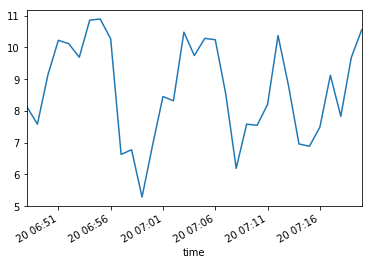

In [75]:
speed1m.plot()

In [76]:
import matplotlib.pyplot as plt

In [77]:
plt.rcParams['figure.figsize'] = (10,6)

In [78]:
plt.style.use('seaborn-whitegrid')

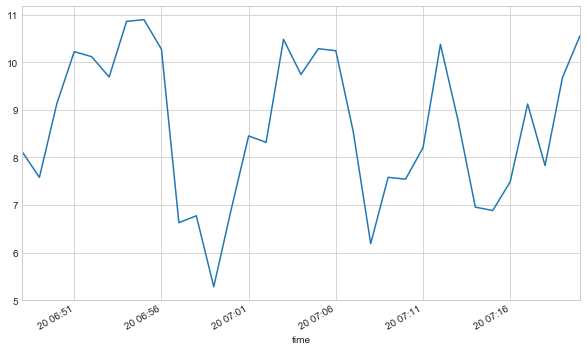

In [79]:
speed1m.plot()

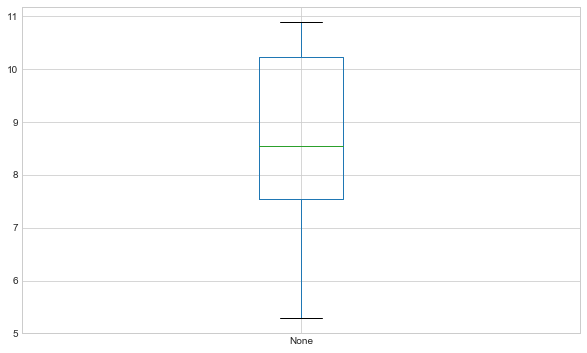

In [80]:
speed1m.plot.box()

# Folium and Geo

In [81]:
import folium

# Draw a track on map

In [82]:
m = folium.Map(location=[df['lng'].mean(), df['lat'].mean()], zoom_start=15)
mdf = df.resample('T').mean()

def add_marker(row):
    marker = folium.CircleMarker([row['lng'], row['lat']], radius = 5, color = 'black', popup=row.name.strftime('%H:%M'))
    marker.add_to(m)

mdf.apply(add_marker, axis=1)
m

##### Now let's draw to track on the map. We start by placing one simple marker. I'll go back to the same code here, and then I'll pick a row. Row = df.iloc 321, and then, the marker is folium.CircleMarker, and the location will be row of longitude and row.latitude. In the final step, we need to tell the marker "add to the map", and display.

##### That's a really big marker. Let's try something a bit smaller. So, we'll go back to the code, and let's say the radius is 5, and run it again. If you look now, we have a marker here in the middle. We can do some styling. For example, we can say that color = red, and then run it, and now our marker has a red color. Another nice thing we can do is add a pop up. So, again, we'll go here and we'll say "popup = 'Hi There'", and run.

##### Now when we click on our marker, we will see the popup. There are several styles of markers in Folium, and the popup can be any HTML. Check out the folium documentation for more details. Now that we know how to place one marker on a map, let's throw the entire track on the map. For this, we'll create a utility function that gets data frame row and adds the marker from the data in this row. So, we go back to the code, and we would write "def add_marker of row" and then we will do this code inside the function.

##### Let's test our function on a single row. So, add marker of row, and run. We see that the marker is drawn on the map. Now, let's add the time as a popup for the marker. So, instead of doing a fixed string, we'll use row time, and run. Then we'll get an error. This failed since the marker expects popup as a string or a Vega object.

##### I wont' go into Vega, which is a language to specify visual elements. You can see some examples in the Folium documentation. You're going to use plain strings here. To convert a time stamp to a string, we'll use the strftime method. So, here, strftime, and percent H colon percent M, and run it. This time, it worked, and if we click on the marker, we'll see the hour. You can see the available format for the strftime in the Python documentation.

##### Once we have our function working to our satisfaction for one row, let's run it on all of them using the data frame apply method. So, we'll delete this one and we say "df.apply, add marker", and we say "axis = one", and delete this line. When we say "axis = one", we tell pandas to run the function on each row as opposed to each column. Let's run this.

##### This took a while to run, and the markers overlap. We need less data points to do this, and we're going to re-sample the data. So, what I'm going to do here, is say that "mdf is the data frame re-sample to T, which is one minute. Then, we'll take the mean. We're going to use the mean function since it makes sense to take the average of the location inside the one minute span. Now, we're going to do mdf.apply instead of df.apply to run the function only on the data frame with one minute intervals.

##### This failed since when we re-sampled the data, we lost the time column. We look at mdf.columns, we see that the time is not there. The reason is that pandas can not average on time stamps. To fix this, we're going to use the row index, which is also the time stamp associated with this row. The row index is accessible using the name attribute. So, let's go here, and instead of row and time, we'll say "row.name strftime", and run.

##### This looks much better. This work flow is very typical with visualization. You need to do some iteration until you get a good one. To get a great one, you need to invest more time tweaking it, but for now I think we are good. As an exercise, try to figure out how to display the time in local time, and not in units.

In [83]:
mdf.columns

Index(['lat', 'lng', 'height', 'dist', 'dt'], dtype='object')

In [84]:
from shapely.geometry import Point, Polygon

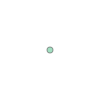

In [85]:
pt = Point(1,2)
pt

In [86]:
pt.x

1.0

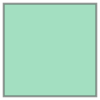

In [87]:
poly = Polygon([[0,0],[0,10],[10,10],[10,0]])
poly

In [88]:
poly.area

100.0

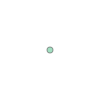

In [89]:
poly.centroid

In [90]:
poly.centroid.xy

(array('d', [5.0]), array('d', [5.0]))

In [91]:
np.stack(poly.exterior.xy).T

array([[  0.,   0.],
       [  0.,  10.],
       [ 10.,  10.],
       [ 10.,   0.],
       [  0.,   0.]])

In [92]:
poly.intersects(pt)

True

In [93]:
poly.intersects(Point(10,20))

False

### The plan is to create a column of points in our data frame. You find an area and color points that are in that area in a different color.

In [94]:
mdf['pt'] = mdf[['lng', 'lat']].apply(Point, axis=1)

In [95]:
mdf.head()

,lat,lng,height,dist,dt,pt
time,,,,,,
2015-08-20 06:48:00+03:00,35.014571,32.519485,122.766666,0.005918,0.000728,POINT (32.51948457142857 35.01457057142857)
2015-08-20 06:49:00+03:00,35.014316,32.518971,122.966667,0.005670,0.000748,POINT (32.51897133333333 35.01431633333333)
2015-08-20 06:50:00+03:00,35.014055,32.517258,114.573913,0.012125,0.001328,POINT (32.51725782608695 35.0140552173913)
2015-08-20 06:51:00+03:00,35.013864,32.516264,106.653334,0.005682,0.000556,POINT (32.5162645 35.01386383333332)
2015-08-20 06:52:00+03:00,35.012744,32.515141,97.710000,0.005705,0.000564,POINT (32.51514063333333 35.0127444)


In [96]:
mean_lng, max_lng = mdf['lng'].mean(), mdf['lng'].max()
mean_lat, max_lat = mdf['lat'].mean(), mdf['lat'].max()

In [97]:
poly = Polygon([
        [mean_lng, mean_lat],
        [mean_lng, max_lat],
        [max_lng, max_lat],
        [max_lng, mean_lat]

])

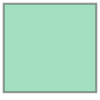

In [98]:
poly

In [99]:
poly.exterior.xy

(array('d', [32.5123189947394, 32.5123189947394, 32.51948457142857, 32.51948457142857, 32.5123189947394]),
 array('d', [35.01567806812503, 35.02252776190477, 35.02252776190477, 35.01567806812503, 35.01567806812503]))

##### This is a bit tricky since folium expects a series of longitude-latitude values. If you ask the polygon for its exterior, we'll get two arrays. So, the polygon dot exterior dot xy. And we see we get two arrays. We're going to do some shape shifting here. This is quite common and lucky for us, numpy makes it easy. First we're going to mesh the two arrays together with numpy dot stack. Numpy dot stack takes two arrays and places one on top of the other. So let's import numpy, import numpy as np.

In [100]:
import numpy as np

In [101]:
np.stack(poly.exterior.xy)

array([[ 32.51231899,  32.51231899,  32.51948457,  32.51948457,
         32.51231899],
       [ 35.01567807,  35.02252776,  35.02252776,  35.01567807,
         35.01567807]])

### And this is almost what we want. We just like to rotate the array by 90 degrees to get the pair of coordinates per row.

In [102]:
np.stack(poly.exterior.xy).T

array([[ 32.51231899,  35.01567807],
       [ 32.51231899,  35.02252776],
       [ 32.51948457,  35.02252776],
       [ 32.51948457,  35.01567807],
       [ 32.51231899,  35.01567807]])

# Generate a Report 

##### Now that we have our report ready, we can publish it. It's usually a good idea to tidy up our reports before publishing them. I'm going to skip this part, but feel free to add Markdown cells for documentation, delete intermediate cells, and cells with error in them. Make sure to re-run the notebook after all the changes. There are several options to publish reports. One is to place the notebook file somewhere public, like in a GitHub repository, and have the nbviewer service render it. This is the nbviewer service. And let's take a look, for example, at Non-Parametric Regression, which is hosted on a public list.

##### And we see that it's rendered by the nbviewer. When we use the nbviewer, we can just distribute the URL. However, some reports might be internal, and we'd like to publish them only to a small set of people. The easy way here, is to generate HTML from the notebook. To do this, click on the file menu, go to Download As, and select HTML. Let's click on the file. We see that the generated HTML includes everything we did, including the charts, and including a fully functional map that we can still use, move around, and zoom.

##### Sometimes we'd like to automate the generation of these reports. Say, run such a notebook every night, and produce some statistics about last day's traffic. There is a utility called npconvert, which renders the notebook to an HTML. It's installed when we intall Jupyter notebook. Let's switch the terminal, or command shell, on Windows. And I'll write jupyter nbcnvert track.ipynb, and this is going to convert and generate the HTML. Note that we did not run any code, it just rendered the ipynb file as HTML.

##### If you'd like to run the code as well, we need to pass the dash dash execute switch to nbconvert. This will do the equivalent of cell run all, before rendering the HTML. Since we have cells with errors in our notebook, we need to delete these cells before running the notebook. So let's get back to the notebook. Any cells with errors. Let's have a look. This cell has an error, so we are going to use the scissors to cut it down. This cell also has errors, so we'll use the scissors.

##### Here's another one. And we made all these errors during the learning process to show some points, but in the final report, we don't want to see them. Alright, let's save, and get back to the shell. Now we are going to execute our notebook. But before we do that, we need to switch to our conda environment so we'll have all the installed packages ready for us. To do that, we're going to do source activate and track, and this will bring us to our track environment.

##### And you see that the prompt has changed. On Windows, you do the same command without the source at the beginning. And now we're going to run jupyter nbconvert dash dash execute track.ipynb. And notice this takes longer now. In our case, every time it executes the code, we'll get the same answer. In some reports, we'd like to run the code with different parameters. There are two main ways to do it. One is for time-based reports, starting from now, and then query a database for yesterday data.

##### The other option is to pass parameters to the notebook using environment variables. This is a super-easy way to generate automatic reports. Once the HTML is generated, you can automatically email it, or copy it to a web server. Python makes these tasks easy as well.